In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dir='../input/alien-vs-predator-images/data/train'
validation_dir='../input/alien-vs-predator-images/data/validation'

In [3]:
import os

print(os.listdir(train_dir))


['predator', 'alien']


In [4]:
print(os.listdir(validation_dir))

['predator', 'alien']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1.0/255.0)

trainDatagen=datagen.flow_from_directory(train_dir,
                                 target_size=(250,250),
                                 batch_size=50,
                                 class_mode='binary')
valDatagen=datagen.flow_from_directory(validation_dir,
                                      target_size=(250,250),
                                      batch_size=10,
                                      class_mode='binary')


Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [17]:
from tensorflow.keras import regularizers
independenceday=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='tanh',input_shape=(250,250,3)),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Dropout(0.2),
                                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           
                                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Dropout(0.2),
                                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Dropout(0.5),
                                           tf.keras.layers.Flatten(),
                                           tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                                            tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                                           tf.keras.layers.Dense(1,activation='sigmoid')])
independenceday.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 124, 124, 16)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 29, 29, 64)       

In [18]:
independenceday.compile(loss='binary_crossentropy',
                       optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
                       metrics=['accuracy'])

In [19]:
history=independenceday.fit_generator(trainDatagen,validation_data=valDatagen,epochs=150,verbose=1)

Epoch 1/150
14/14 [==============================] - 3s 218ms/step - loss: 1.8289 - accuracy: 0.5231 - val_loss: 1.7706 - val_accuracy: 0.6350
Epoch 2/150
14/14 [==============================] - 2s 178ms/step - loss: 1.7306 - accuracy: 0.5980 - val_loss: 1.6925 - val_accuracy: 0.6250
Epoch 3/150
14/14 [==============================] - 3s 182ms/step - loss: 1.6647 - accuracy: 0.6297 - val_loss: 1.6284 - val_accuracy: 0.6150
Epoch 4/150
14/14 [==============================] - 3s 182ms/step - loss: 1.6096 - accuracy: 0.6311 - val_loss: 1.5775 - val_accuracy: 0.6150
Epoch 5/150
14/14 [==============================] - 3s 198ms/step - loss: 1.5387 - accuracy: 0.6643 - val_loss: 1.5656 - val_accuracy: 0.6100
Epoch 6/150
14/14 [==============================] - 2s 176ms/step - loss: 1.4869 - accuracy: 0.6758 - val_loss: 1.4764 - val_accuracy: 0.6550
Epoch 7/150
14/14 [==============================] - 2s 177ms/step - loss: 1.4277 - accuracy: 0.7003 - val_loss: 1.4509 - val_accuracy: 0.6450

Epoch 58/150
14/14 [==============================] - 2s 176ms/step - loss: 0.5388 - accuracy: 0.9409 - val_loss: 1.0363 - val_accuracy: 0.7100
Epoch 59/150
14/14 [==============================] - 2s 177ms/step - loss: 0.5641 - accuracy: 0.9193 - val_loss: 0.8999 - val_accuracy: 0.7550
Epoch 60/150
14/14 [==============================] - 2s 176ms/step - loss: 0.5314 - accuracy: 0.9568 - val_loss: 0.8693 - val_accuracy: 0.7800
Epoch 61/150
14/14 [==============================] - 3s 189ms/step - loss: 0.5675 - accuracy: 0.9251 - val_loss: 0.9276 - val_accuracy: 0.7350
Epoch 62/150
14/14 [==============================] - 3s 181ms/step - loss: 0.5149 - accuracy: 0.9539 - val_loss: 0.8456 - val_accuracy: 0.8050
Epoch 63/150
14/14 [==============================] - 3s 187ms/step - loss: 0.4825 - accuracy: 0.9712 - val_loss: 0.8621 - val_accuracy: 0.7700
Epoch 64/150
14/14 [==============================] - 2s 175ms/step - loss: 0.4901 - accuracy: 0.9539 - val_loss: 0.9049 - val_accuracy:

Epoch 115/150
14/14 [==============================] - 2s 177ms/step - loss: 0.2532 - accuracy: 0.9957 - val_loss: 0.9637 - val_accuracy: 0.7550
Epoch 116/150
14/14 [==============================] - 3s 193ms/step - loss: 0.3200 - accuracy: 0.9640 - val_loss: 0.9499 - val_accuracy: 0.7700
Epoch 117/150
14/14 [==============================] - 3s 184ms/step - loss: 0.2427 - accuracy: 1.0000 - val_loss: 0.9158 - val_accuracy: 0.7900
Epoch 118/150
14/14 [==============================] - 3s 180ms/step - loss: 0.2462 - accuracy: 0.9942 - val_loss: 0.9025 - val_accuracy: 0.7750
Epoch 119/150
14/14 [==============================] - 2s 170ms/step - loss: 0.2816 - accuracy: 0.9813 - val_loss: 0.8993 - val_accuracy: 0.7600
Epoch 120/150
14/14 [==============================] - 3s 187ms/step - loss: 0.2336 - accuracy: 0.9986 - val_loss: 0.9205 - val_accuracy: 0.7700
Epoch 121/150
14/14 [==============================] - 2s 170ms/step - loss: 0.2392 - accuracy: 0.9928 - val_loss: 0.8789 - val_ac

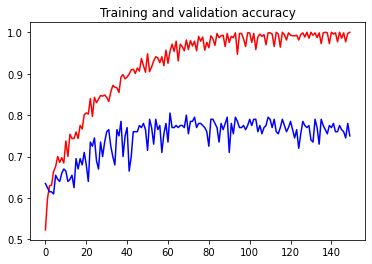

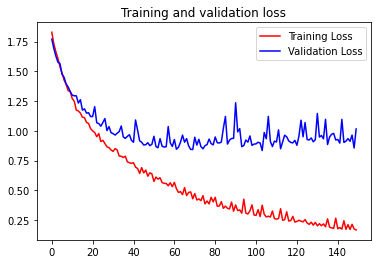

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()